In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [3]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)
rfs_start = time.time()
no_PCA_rfs = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
rfs_end = time.time()
no_PCA_svc = SVC().fit(X_train, y_train)
svc_end = time.time()
print("RandomForestClassifier:")
print(f"Whole process: {rfs_end-start}")
print(f"Accuracy: {accuracy_score(no_PCA_rfs.predict(X_test), y_test)}")
print("---------------------------------------------------------------")
print("SVC:")
print(f"Whole process: {svc_end-rfs_end+rfs_start-start}")
print(f"Accuracy: {accuracy_score(no_PCA_svc.predict(X_test), y_test)}")

RandomForestClassifier:
Whole process: 5.102505922317505
Accuracy: 0.969
---------------------------------------------------------------
SVC:
Whole process: 116.92656016349792
Accuracy: 0.9795


In [4]:
start = time.time()
Xr = PCA(n_components=0.95).fit_transform(mnist.data)
pcat = time.time()
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, mnist.target, test_size=0.2)
trainingR_start = time.time()
PCA_rfs = RandomForestClassifier(n_jobs=-1).fit(Xr_train, yr_train)
trainingR = time.time()
svc = SVC().fit(Xr_train, yr_train)
trainingS = time.time()
print(f"PCA: {pcat-start}")
print(f"RandomForestClassifier:")
print(f"Training: {trainingR-trainingR_start}\nWhole process: {trainingR-start}")
print(f"Accuracy: {accuracy_score(PCA_rfs.predict(Xr_test), yr_test)}")
print("--------------------------------------------------------------")
print(f"SVC:")
print(f"Training: {trainingS-trainingR}\nWhole process: {trainingS-trainingR+trainingR_start-start}")
print(f"Accuracy: {accuracy_score(svc.predict(Xr_test), yr_test)}")

PCA: 3.1064157485961914
RandomForestClassifier:
Training: 9.992311239242554
Whole process: 13.242784261703491
Accuracy: 0.9487857142857142
--------------------------------------------------------------
SVC:
Training: 38.775434494018555
Whole process: 42.02590751647949
Accuracy: 0.9831428571428571


/home/bartosz/anaconda3/envs/aurelion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/bartosz/anaconda3/envs/aurelion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


ValueError: x and y must be the same size

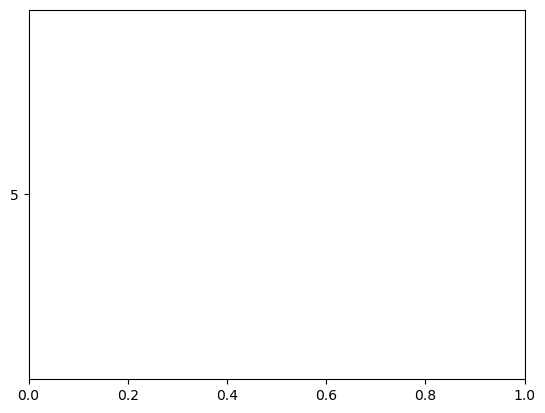

In [5]:
X_tsne = TSNE().fit_transform(mnist.data)

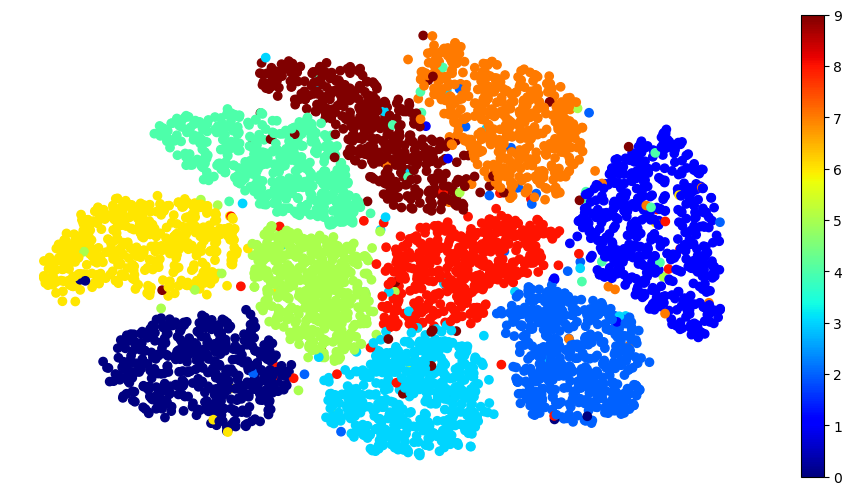

In [29]:
plt.figure(figsize=(12,6))
random_idx = np.random.permutation(69999)[:5000]
plt.scatter(X_tsne[random_idx,0], X_tsne[random_idx,1], c=mnist.target[random_idx].astype(int), cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()